## Visualization in Python

### Coding lecture

#### The importance of visualization

When using the pandas data frame, we saw that boxplots are much more informative in describing distributions than a bunch of statistics provided as simple text. This is a very general rule: whenever you must present data, a faithful, clear, captivating plot is always more informative than a numerical table.

Several options are available in Python for creating effective visualizations. One of the most widely used library is *matplotlib*. The graphical capabilities of pandas are largely based on this library. A relevant alternative to matplotlib is *seaborn*. Today we will learn how create scatterplots, boxplots and barplots in python, using either matplotlib, seaborn, and pandas as well. Many other figures can be created using these libraries: explore the [matplotlib](https://matplotlib.org/stable/index.html), [seaborn](https://seaborn.pydata.org/index.html) and [pandas](https://pandas.pydata.org/docs/)online documentation for deepening your knowledge!

#### Data from space

For today lesson we will again analyze the data seen in module 3.3. This is a fictitious experiments, where the dfferent dietary and life style factors are measured on 1500 subjects. The measurement include sugar consumption level (total amount of sugar you consume over the day), amount of daily physical exercise, LDL cholesterol level, and whether you LDLD colestherol is high (>120) or not.The catch is that half of the samples were taken on Earth, while the other half... on Venus! 

Let's load the data as we saved then at the end of lesson 3.3.2.

In [18]:
# import pandas
import pandas as pd

# reading our data frame with read_csvimport numpy as np
df = pd.read_csv('DATA_FSB_SET_3_mod.csv', index_col = 'Individual')

# showing the data frame
df

,LDL_levels,Planet,Exercise,Sugar_consumption
Individual,,,,
Patient_1,117.084348,Earth,35.225465,33.074228
Patient_2,106.295820,Earth,86.118299,35.766400
Patient_3,122.064582,Earth,75.440539,30.140532
Patient_4,126.171853,Earth,39.336172,30.966869
Patient_5,132.882935,Earth,23.614529,39.043881
...,...,...,...,...
Patient_1496,90.586941,Venus,70.696798,25.965687
Patient_1497,67.401280,Venus,97.889474,37.641569
Patient_1498,120.891409,Venus,20.061231,43.162917


In [19]:
# Let us remember how to create the column of High_LDL_levels
high_LDL = df['LDL_levels'] > 120
high_LDL
df['High_LDL_levels'] = high_LDL
df

,LDL_levels,Planet,Exercise,Sugar_consumption,High_LDL_levels
Individual,,,,,
Patient_1,117.084348,Earth,35.225465,33.074228,False
Patient_2,106.295820,Earth,86.118299,35.766400,False
Patient_3,122.064582,Earth,75.440539,30.140532,True
Patient_4,126.171853,Earth,39.336172,30.966869,True
Patient_5,132.882935,Earth,23.614529,39.043881,True
...,...,...,...,...,...
Patient_1496,90.586941,Venus,70.696798,25.965687,False
Patient_1497,67.401280,Venus,97.889474,37.641569,False
Patient_1498,120.891409,Venus,20.061231,43.162917,True


From lesson 3.3.2 we already know that `Exercise` and `Sugar_consumption` contain negative values that are not physically possible. We will just filter out the respective rows.

In [20]:
# eliminating subjects with impossible values
df = df[(df.Sugar_consumption >= 0) & (df.Exercise >= 0)]

We are ready! Let's explore the relationships among these quantities!

#### Scatterplots

Let's start by visualizing the relationship between sugar consumption and exercise level. Since both values are continuous, we can use a scatterplot.

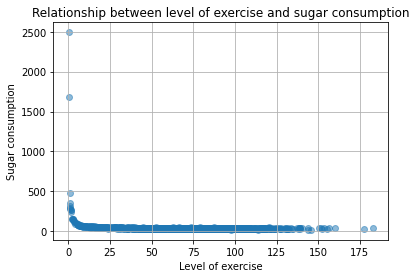

In [21]:
# importing matplotlib
import matplotlib.pyplot as plt

# creating an empty figure
fig, ax = plt.subplots()

# specifying the characteristics of the scatterplot
ax.scatter(x = df.Exercise, y = df.Sugar_consumption, alpha=0.5)

# curating important details: labels, grid
ax.set_xlabel('Level of exercise')
ax.set_ylabel('Sugar consumption')
ax.set_title('Relationship between level of exercise and sugar consumption')
ax.grid(True)

There are some important concepts to underline here:
- the `matplotlit.pyplot` subpackage allows to specify plots with a Matlab-like API
- the `plt.subplots()` command produces two interconnected objects: `fig` and `ax`. The `ax` object is the plot we want to populate with our data. The `fig` object is akin to an empty canvas that can host one or more plots. In our case, 'fig' is hosting only the `ax` plot
- `ax.scatter` specifies that we want to create a scatterplot, with `df.Exercise` on the x-axis and `df.Sugar_consumption` on the y-axis
- the remaining command set important details of the plot (grid, labels)

There seems to be an inverse relationship between the amount of sugar consumed every day and the level of daily exercise. Is this relatioship influenced by the level of LDL cholesterol?

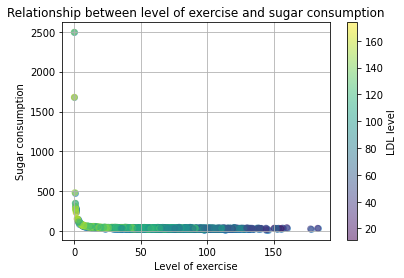

In [22]:
# updating the scatterplot
points = ax.scatter(x = df.Exercise, y = df.Sugar_consumption, alpha = 0.5, c = df.LDL_levels)

# adding a color bar
colbar = fig.colorbar(points)
colbar.set_label('LDL level')

# plotting the figure
fig

Let's dissect these last lines of code. First we updated the scatterplot by linking the color of the points with LDL levels. Notive that this time we capture the `point` object out of the `ax.scatter` method. We need this object for properly setting the color bar that will lay next to the plot. Finally, we plot the figure with the last istruction, `fig`.

It seems that also the LDL level is lower in people exercising more. Go sport!

How can we create a similar plot in seaborn? Let's see the code.

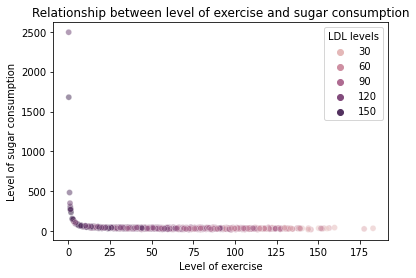

In [23]:
# let's import seaborn
import seaborn as sns

# creating the scatterplt
sns.scatterplot(x = 'Exercise', y = 'Sugar_consumption', alpha = 0.5, hue = 'LDL_levels', data = df)

# specifying the details of the plot with pyplot function: title, labels.
plt.title('Relationship between level of exercise and sugar consumption')
plt.legend(title = 'LDL levels')
plt.xlabel('Level of exercise')
plt.ylabel('Level of sugar consumption')
plt.show()

Creating the scatterplot seems to have required less code with seaborn. This is because the `sns.scatterplot` function encapsulates and hides commands (like the creation of the figure and axis) that otherwise we should write ourselves. One important thing: after creating the scatterplot, we use functions from the pyplot subpackage for setting title and labels. How is this possible?
- The seaborn package is based on matplotlib. This means that each time we create a plot with seaborn, we are actually creating a matplotlib figure. Consequently, pyplot functions work perfectly fine on seaborn plots
- The pyplot subpackage "focuses" on a figure at the time, namely the "current" figure. When we created the scatterplot with the `sns.scatterplot` function, this plot became the current one. After that moment, and until we create a new figure, all pyplot functions will operate on the current scatterplot.

#### Boxplots

We have already seen boxplots in our lesson on pandas. Can we use seaborn to produce a more captivating version? Let's see!

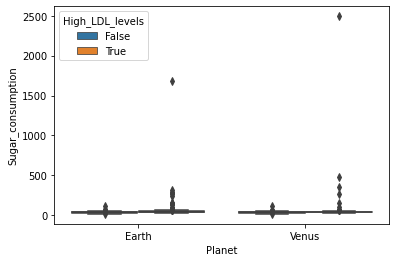

In [24]:
# visualizing sugar consumption on different planets and accoring to different LDL colestherol levels
ax = sns.boxplot(x = 'Planet', 
            y = 'Sugar_consumption',
            hue = 'High_LDL_levels', 
            data = df)

While the figure is already clear, we can improve it by tuning some of its esthetics

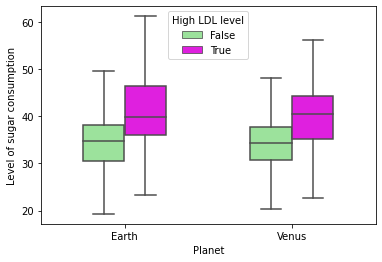

In [25]:
# same as before, we cosmetic modifications
ax = sns.boxplot(x = 'Planet', 
            y = 'Sugar_consumption',
            hue = 'High_LDL_levels', 
            palette = ('lightgreen', 'magenta'),
            showfliers = False,
            width = 0.5,
            data = df)

# specifying further details
plt.legend(title = 'High LDL level', loc='upper center')
plt.xlabel('Planet')
plt.ylabel('Level of sugar consumption')
plt.show()

The plot now highlights a higher consumption of sugar for subjects with high LDL colestherol level, while no difference seems to be present across planets. Care should be exercise when reporting this plot: it should be made clear that outliers have been removed for sake of clarity.

#### Barplots

Finally, we want to represent the relationship between `Planet` and `High_LDL_levels` through a graph. Neither variable is numerical, and thus we will use a bar plot for summarizing how many patients fall in the different categories defined by considering both variables. First things first, let's create a contingency table representing the relationship between these two variables!

In [26]:
# contingency table
ct = pd.crosstab(df.Planet, df.High_LDL_levels)
ct

High_LDL_levels,False,True
Planet,,
Earth,415,331
Venus,585,123


This table already contains all the information we need, but it is not easy to comprehend it. A barplot will make the interpretation much easier:

Text(0, 0.5, 'Number of patients')

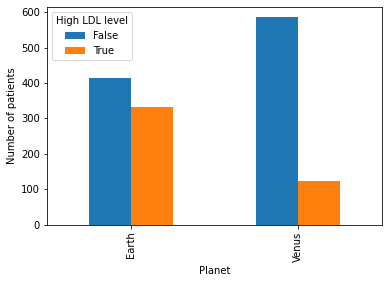

In [27]:
# barplot functionality provided by the pandas library
ax = ct.plot.bar()

# further details tuned through pyplot function
plt.legend(title = 'High LDL level')
plt.ylabel('Number of patients')

The plot makes immediately clear that patients living on Venus usually have low levels of LDL colestherol, while almost half of the patients living on Earth have high colestherol. Time to consider an interplanetary relocation!